In [ ]:
import pandas as pd
from bunkatech.semantics.bourdieu import Bourdieu
import bamboolib
pd.options.mode.chained_assignment = None

import numpy as np
import random

data = pd.read_csv(
    "/Users/charlesdedampierre/Desktop/ENS Projects/imaginary-world/db_film_iw (2).csv",
    index_col=[0],
)

In [ ]:
bourdieu = Bourdieu(data = data, text_var = 'description', index_var = 'imdb')

In [ ]:
bourdieu.fit(extract_terms = True,
            docs_embedding = False, 
            terms_embedding = True, 
            sample_size_terms = 1000, 
            terms_limit =1000,
            terms_ents = False,
            terms_ngrams = (2,2),
            terms_ncs = False,
            language = 'en')

In [ ]:
bourdieu.bourdieu_projection_unique( projection_1 = ['young', 'old'], type = 'terms', height = 500, width = 1000)

In [215]:
df = bourdieu.terms_embeddings
from sklearn.metrics.pairwise import cosine_distances

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

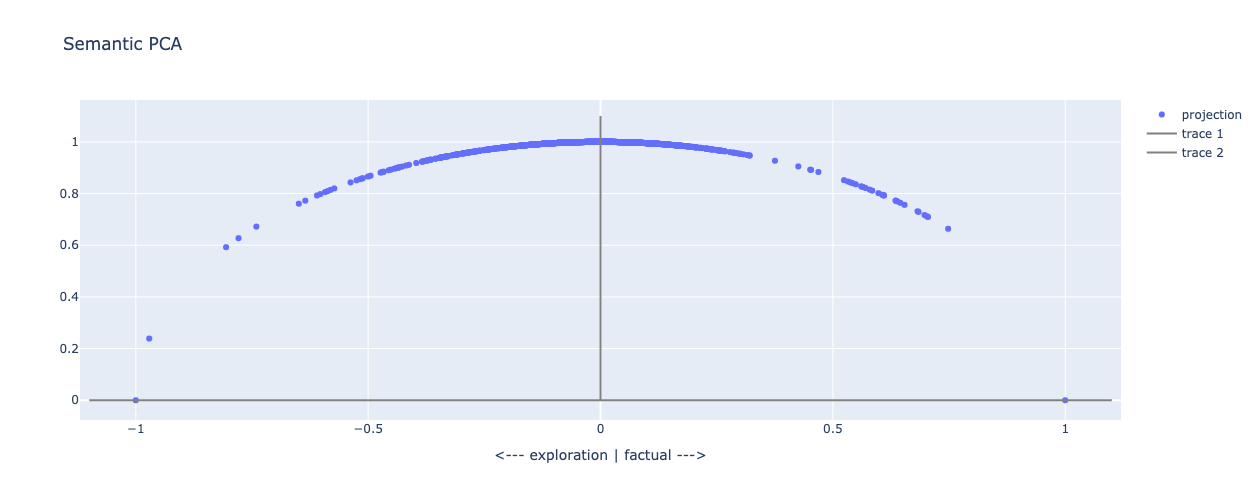

In [244]:
projection_2 = None

if projection_2 is None:

    projection_1 = ['factual', 'exploration']
    projection_str_1 = "-".join(projection_1)


    df_bert = bourdieu.compute_projection_embeddings(projection_1)
    df_proj = df_bert[projection_1]

    df_proj[projection_str_1] = df_proj[projection_1[0]] - df_proj[projection_1[1]]

    scaler = MinMaxScaler(feature_range=(-1, 1))
    df_proj["term"] = df_proj.index


    scaler = MinMaxScaler(feature_range=(-1, 1))
    df_proj[projection_str_1] = scaler.fit_transform(
        df_proj[projection_str_1].values.reshape(-1, 1)
    )
    
df_proj['project_angle'] = np.sqrt(1-df_proj[projection_str_1]**2) # Pythagore


fig = go.Figure()

trace_1 = go.Scatter(
    x=[-1.1, 1.1],
    y=[0, 0],
    mode="lines",
    line_color="grey")


trace_2 = go.Scatter(
    x=[0, 0],
    y=[0, 1.1],
    mode="lines",
    line_color="grey")

trace_scatter = go.Scatter(
    x=df_proj[projection_str_1],
    y=df_proj['project_angle'],
    text = df_proj['term'],
    mode="markers",
    name = 'projection')

fig.add_trace(trace_scatter)
fig.add_trace(trace_1)
fig.add_trace(trace_2)


fig.update_layout(
        title='Semantic PCA',
        height=500,
        width=1000,
        xaxis_title="<--- " + " | ".join(reversed(projection_1)) + " --->",
    )

fig.show()

In [172]:
def make_edge(x, y, text, width):
    return go.Scatter(
        x=x,
        y=y,
        hoverinfo="text",
        mode="lines",
    )


In [178]:
import plotly.graph_objs as go


In [210]:
'''

texts = []
for name, row in test.iterrows():
    x = row['dim_1']
    y = row['dim_2']
        
    trace = make_edge(x=[0.0, x, None], y = [0.0, y, None], text = name, width = 0.2)
    
    
    fig.add_trace(trace)
'''

"\n\ntexts = []\nfor name, row in test.iterrows():\n    x = row['dim_1']\n    y = row['dim_2']\n        \n    trace = make_edge(x=[0.0, x, None], y = [0.0, y, None], text = name, width = 0.2)\n    \n    \n    fig.add_trace(trace)\n"

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

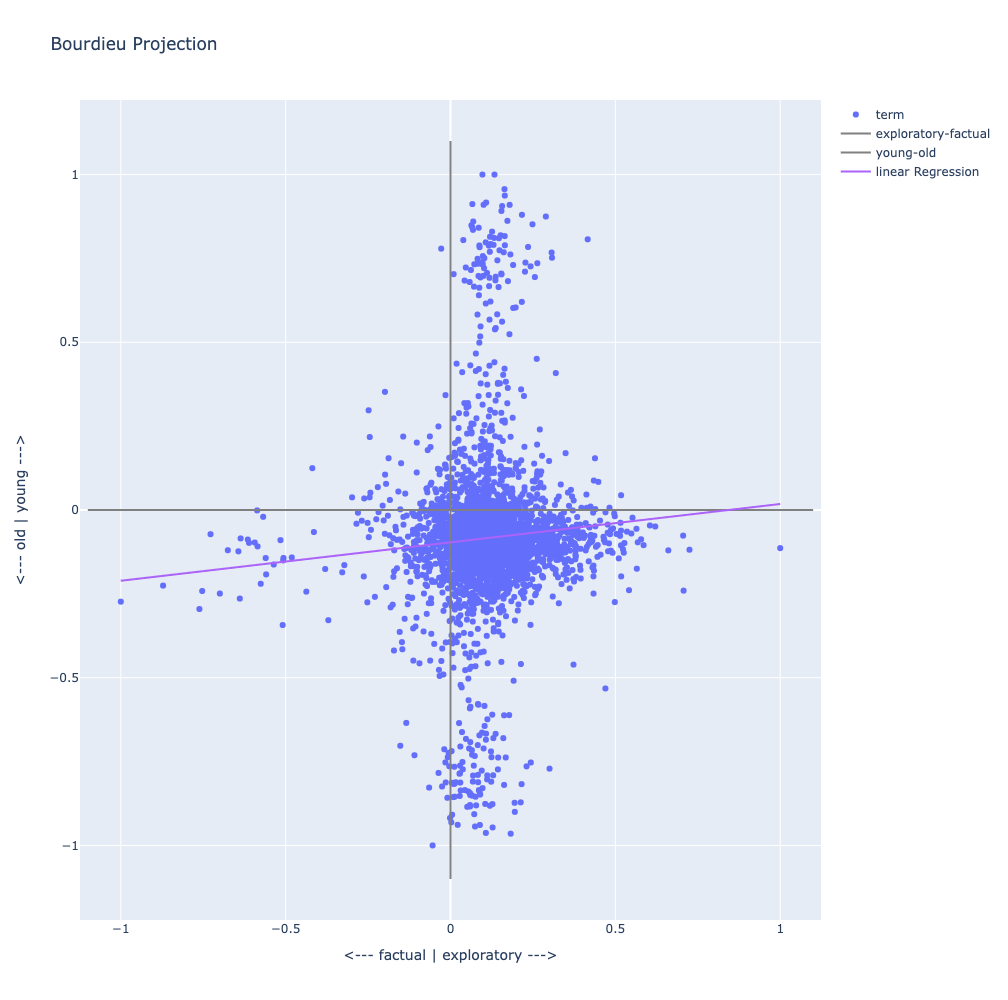

In [34]:
projection_1 = ['exploratory', 'factual']

#projection_1 = ['men', 'women']
projection_2 = ['young', 'old']

fig = bourdieu.bourdieu_projection(
        projection_1,
        projection_2,
        height= 1000,
        width = 1000,
        regression=True,
        type="terms")
fig.show()